# Plotting and For Loops

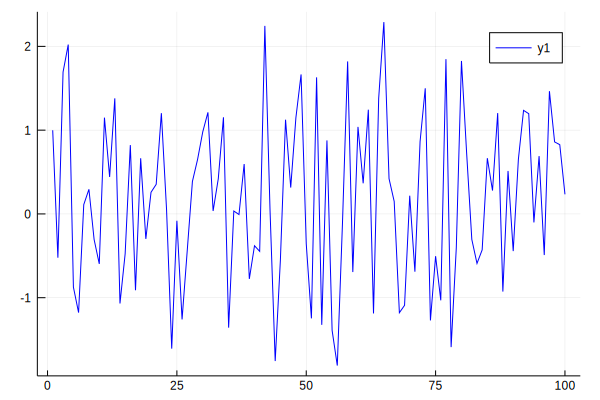

In [1]:
using Plots
n = 100
ϵ_vals = randn(n)
plot(ϵ_vals, color="blue")

## Another Way

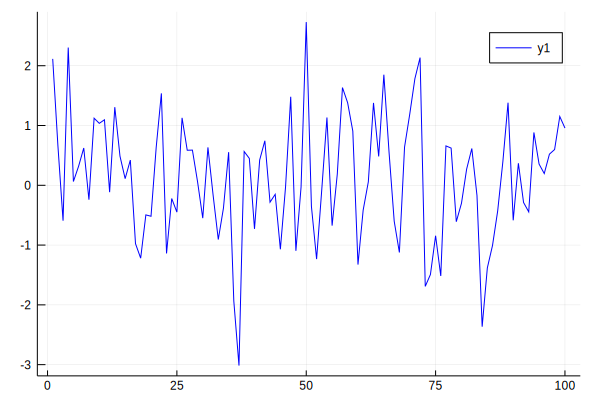

In [2]:
n = 100
ϵ_vals = Array{Float64}(n)
for i in 1:n
    ϵ_vals[i] = randn()
end
plot(ϵ_vals, color="blue")

## Foreach-style loops

In [3]:
words = ["hello", "goodbye"]
for word in words
    println(word)
end

hello
goodbye


## While Loop + If Statement

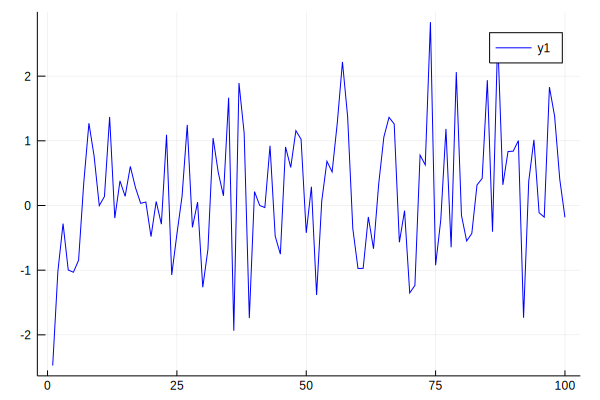

In [4]:
n = 100
ϵ_vals = Array{Float64}(100)
i = 1
while true
    ϵ_vals[i] = randn()
    i += 1
    if i > n
        break
    end
end
plot(ϵ_vals, color="blue")

## UDFs

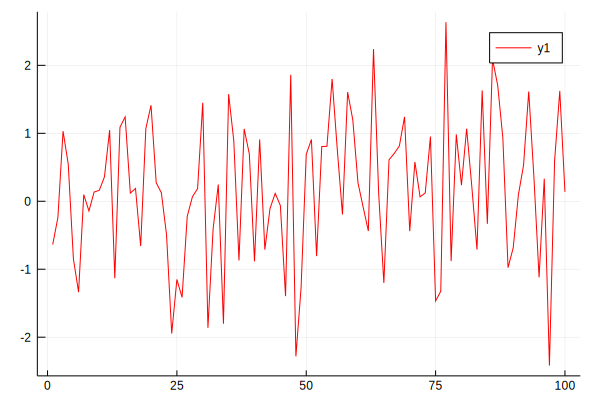

In [5]:
function generate_data(n)
    vals = Array{Float64}(n)
    for i in 1:n
        vals[i] = randn()
    end
    return vals
end

plot(generate_data(100), color="red")

In [6]:
using Distributions

function plot_histogram(dist, n)
    vals = rand(dist, n)
    histogram(vals)
end

rv = BivariateNormal((3, 2))
plot_histogram(rv, 1000)

LoadError: [91mUndefVarError: BivariateNormal not defined[39m

# Exercises

## Exercise 1

In [7]:
function factorial2(n)
    if n <= 1
        return 1
    end
    ans = 1
    for i in 2:n
        ans *= i
    end
    return ans
end

println(factorial2(5))

120


## Exercise 2

In [8]:
function binomial_rv(n, p)
    count = 0
    for i in 1:n
        if rand() < p
            count += 1
        end
    end
    return count
end
    
for i in 1:25
    b = binomial_rv(10, 0.5)
    print("$b, ")
end

4, 8, 3, 4, 6, 7, 4, 5, 6, 5, 5, 5, 7, 3, 0, 5, 2, 5, 5, 4, 2, 6, 5, 5, 6, 

## Exercise 3

In [9]:
function approximate_pi(n_trials)
    count = 0
    for i in 1:n_trials
        x, y = rand() - 0.5, rand() - 0.5
        if (x*x) + (y*y) < .25
            count += 1
        end
    end
    return (4 / n_trials) * count
end

approximate_pi(99999)

3.144191441914419

## Exercise 4

In [10]:
function random_device()
    run = 0
    for i in 1:10
        if rand() < 0.5
            run += 1
            if run == 3
                return 1
            end
        else
            run = 0
        end
    end
    return 0
end

random_device()

1

## Exercise 5

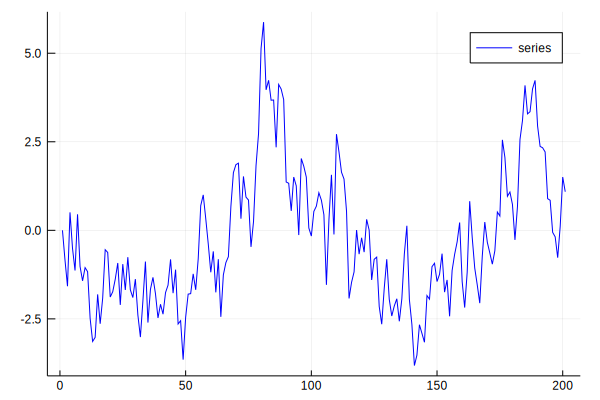

In [11]:
function generate_correlated_series(T, α)
    vals = Array{Float64}(T+1)
    vals[1] = 0
    for i in 2:T+1
        vals[i] = α * vals[i-1] + randn()
    end
    return vals
end

plot(generate_correlated_series(200, 0.9), color="blue", label="series")

## Exercise 6

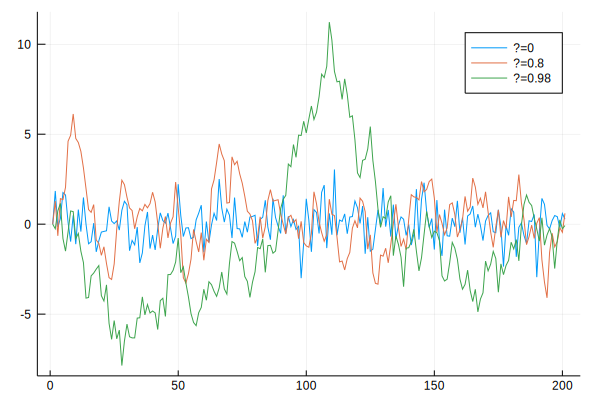

In [12]:
vals = [generate_correlated_series(200, 0), generate_correlated_series(200, .8), generate_correlated_series(200, .98)];

plot(vals, label=["α=0", "α=0.8", "α=0.98"])